<a href="https://colab.research.google.com/github/vadimoz1032/LR-MLDL/blob/main/%D0%9B%D0%A0_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовили студенты ИУ10-91, Грабчук Д.С., Конюхов М.В, Розанов В.В.

Импортируем все необходимые библиотеки Python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from IPython.core.pylabtools import figsize

data_test = pd.read_csv('/content/heart.csv')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Разделим данные по принципу отложенной выборки

In [ ]:
from sklearn.model_selection import train_test_split

X = data_test[data_test.columns[:-1]]
y = data_test['output']

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3


Произведем обработку данных, используя различные графика и гистограммы

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


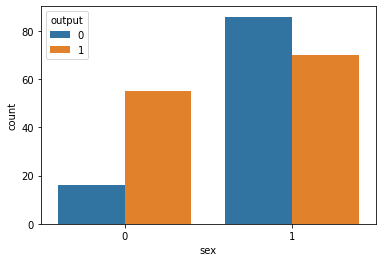

In [ ]:
sns.countplot(X_train['sex'], hue=y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


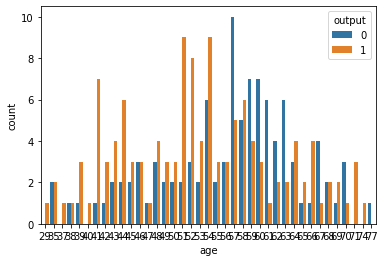

In [ ]:
sns.countplot(X_train['age'], hue=y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


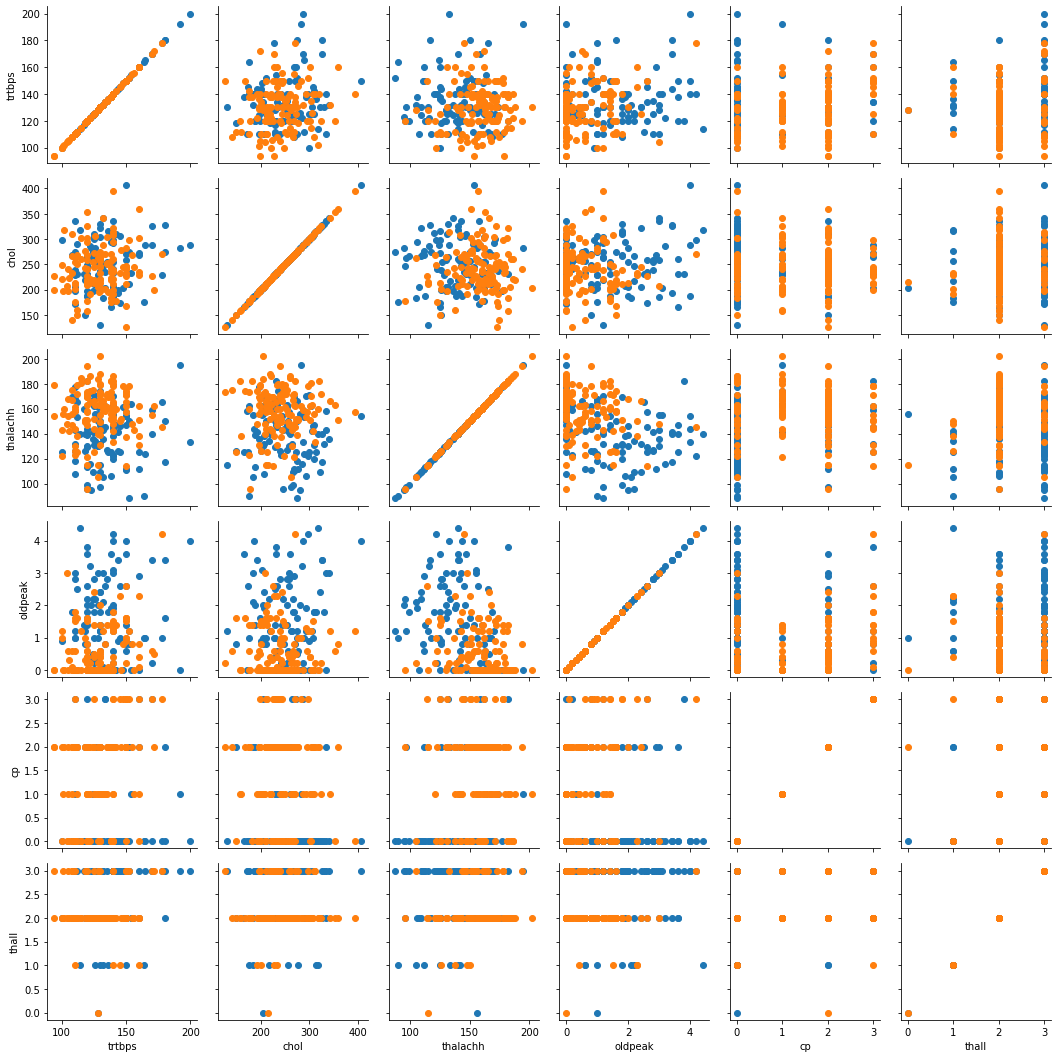

In [ ]:
df_for_pairgrid = X_train[['trtbps', 'chol', 'thalachh', 'oldpeak', 'cp', 'thall']]
df_for_pairgrid['output'] = y_train

sns.PairGrid(df_for_pairgrid, hue='output').map(plt.scatter)

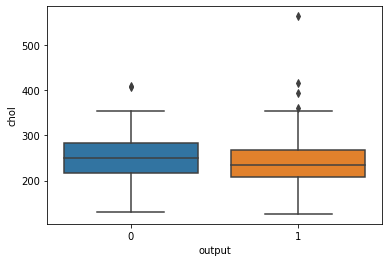

In [ ]:
chol = pd.read_csv('/content/heart.csv')['chol']
sns.boxplot(x=y, y=chol)

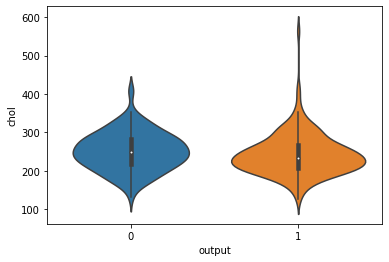

In [ ]:
sns.violinplot(x=y, y=chol)

Произведем нормализацию данных

Качество алгоритма до нормализации:  0.5263157894736842
Качество алгоритма после нормализации:  0.75


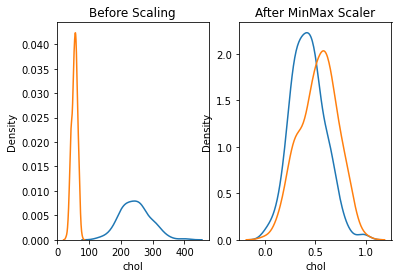

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

print("Качество алгоритма до нормализации: ",
    KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train).score(X_test, y_test))

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

print("Качество алгоритма после нормализации: ",
      KNeighborsClassifier(n_neighbors=2).fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['chol'], ax=ax1)
sns.kdeplot(X_train['age'], ax=ax1)
ax2.set_title("After MinMax Scaler")
sns.kdeplot(X_train_scaled['chol'], ax=ax2)
sns.kdeplot(X_train_scaled['age'], ax=ax2)
plt.show()

Подберем наиюолее эффективный алгоритм классификации

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB

for cls in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(cls.__class__.__name__, cls.fit(X_train, y_train).score(X_test, y_test))

DecisionTreeClassifier 0.7368421052631579
SGDClassifier 0.6052631578947368
SVC 0.6447368421052632
GaussianNB 0.7894736842105263
KNeighborsClassifier 0.618421052631579
